# Autodiff

## Understanding Backprop

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*sSIeU-WhsuHCQlOA00IBXg.jpeg)

[RESOURCE](https://brilliant.org/wiki/backpropagation/)

## Autodiff and Computational Graphs 

[SOURCE](https://youtu.be/wG_nF1awSSY)

A computational graph is a directed graph where the nodes correspond to operations or variables. Variables can feed their value into operations, and operations can feed their output into other operations. This way, every node in the graph defines a function of the variables.

![IMAGE](https://media.geeksforgeeks.org/wp-content/uploads/20200527151747/e19.png)

There are **four** types of differentiations in computational mathematics

![image](https://i.imgur.com/YDliBhT.png)

Now for some functions the above three pose a problem

![](https://i.imgur.com/bz1cfDn.png)

There are two modes in `Autodiff`

![](https://i.imgur.com/rPQil0n.png)

<br/>
Consider Forward Mode

![](https://i.imgur.com/CPxfkuU.png)

What are we doing ?

![](https://i.imgur.com/HtnxgAM.png)


The Reverse Mode:

![](https://i.imgur.com/D5xNdwi.png)

In [1]:
import base.ComputationalGraphs as cg
import base.visualizers as vis

In [2]:
a = cg.Edge(value=5, name='a')
b = cg.Edge(value=3, name='b')
c = cg.Edge(value=2, name='c')
const = cg.Edge(3, '3')

In [3]:
d = b*c
d.name = 'd'
d.history['*'] = (b, c)
e = a + d
e.name = 'e'
e.history['+'] = (a, d)
f = e*const
f.history['*'] = (const, e)
f.name = 'f'

In [4]:
operations_dict = {(0, 'd'): (b, c, cg.mul), (1, 'e'): (a, d, cg.add), (2, 'f'): (e, const, cg.mul)}
base_vars = [a, b, c]

In [5]:
sketcher = vis.Sketcher(base_vars)

/home/freyr/dev/academics/Modelling and Simulation/Assignment3/Rev2_Autodiff/base/visualizers.py:55: UserWarning: Any previous values will be overwritten, Its recommended to name the file
  warn("Any previous values will be overwritten, Its recommended to name the file")


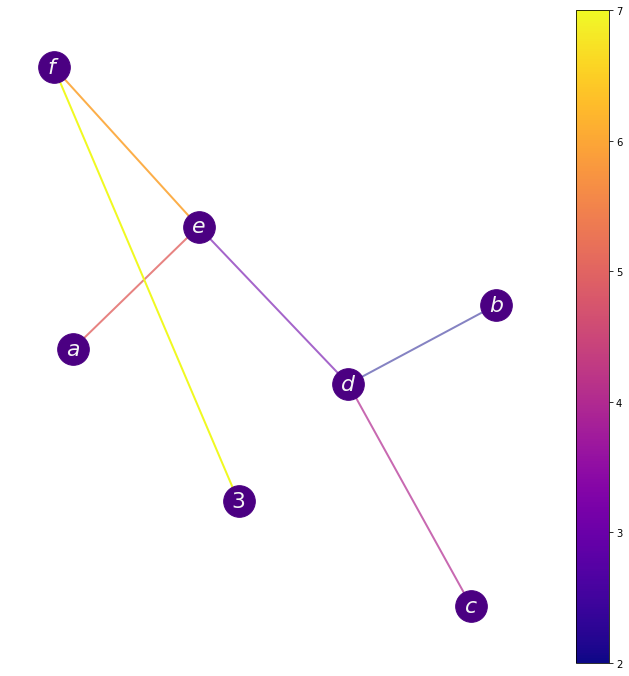

In [6]:
sketcher.visualize(operations_dict)

In [7]:
gradients = cg.get_gradients(f)

print(gradients)

defaultdict(<function get_gradients.<locals>.<lambda> at 0x7fa483a52a60>, {e = 11: 3, a = 5: 3, d = 6: 3, b = 3: 6, c = 2: 9, 3 = 3: 11})


In [8]:
gradients[a]

3

In [9]:
a = cg.Edge(value=5, name='a')
b = cg.Edge(value=1, name='b')

c = cg.neg(a)
c.name = 'c'
d = cg.exp(c)
d.name = 'd'
e = b + d
e.name = 'e'
f = cg.inv(e)
f.name= 'f'

dummy = cg.Edge(value=1, name='dummy')

In [10]:
operations_dict = {(0, 'c'): (a, None, cg.neg), (1, 'd'): (c, None, cg.exp), (2, 'e'): (b, d, cg.add), (3, 'f'): (e, None, cg.inv)}

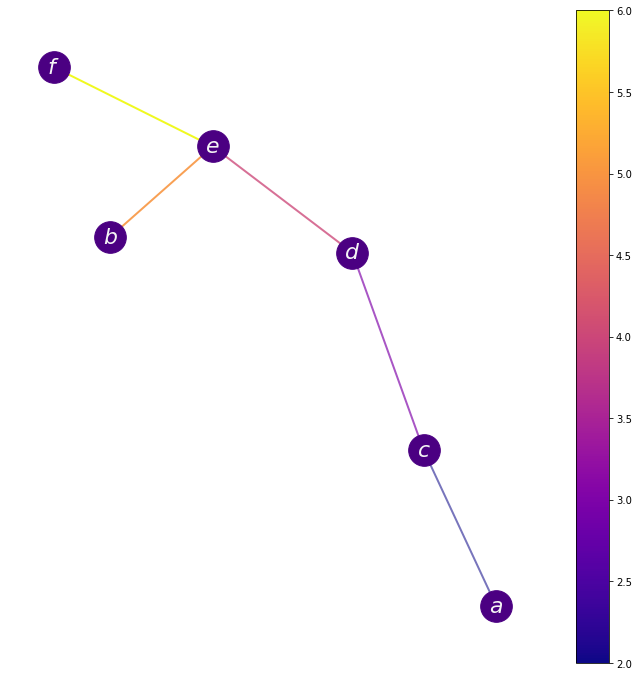

In [11]:
sketcher = vis.Sketcher(base_vars)
sketcher.visualize(operations_dict, filename='sigmoid')


In [12]:
sketcher.graph.edges

OutEdgeView([('a', 'c'), ('c', 'd'), ('d', 'e'), ('b', 'e'), ('e', 'f')])

In [13]:
f = cg.Edge(1, '1')/(cg.Edge(1, '1')+cg.exp(a))

In [14]:
gradients = cg.get_gradients(f)

print(gradients)

defaultdict(<function get_gradients.<locals>.<lambda> at 0x7fa48409b700>, {1 = 1: 0.0066928509242848554, (1/(1 + exp(a))) = 0.0066928509242848554: 1, (1 + exp(a)) = 149.4131591025766: -4.4794253494700645e-05, 1 = 1: -4.4794253494700645e-05, exp(a) = 148.4131591025766: -4.4794253494700645e-05, a = 5: -0.006648056670790155})
